# Frecuencia de palabras en *Dracula* de Bram Stocker
## Alberto Benavides

Un análisis estadístico básico de un libro consiste en analizar la frecuencia con que aparecen las palabras con que está escrito. Una guía bastante completa para lograrlo en R puede consultarse [aquí](https://compsocialscience.github.io/summer-institute/2018/materials/day3-text-analysis/basic-text-analysis/rmarkdown/Basic_Text_Analysis_in_R.html).

El libro de *Dracula* se encuentra disponible de manera gratuita en el sitio de [Project Gutemberg](https://www.gutenberg.org/) que alberga libros cuya propiedad intelectual ha caducado y, por lo tanto, se trata de obras que forman parte del dominio público. Se puede acceder a los textos planos de estas obras mediante la librería [`gutembergr`](https://cran.r-project.org/web/packages/gutenbergr/vignettes/intro.html) de R y la descomposición en palabras de la obra se facilita con el uso de [`tidytext`](https://cran.r-project.org/web/packages/tidytext/index.html) que, a su vez, utiliza para su funcionamiento la librería [`dplyr`](https://www.rdocumentation.org/packages/dplyr/versions/0.7.8).

In [1]:
if (!require('gutenbergr')) install.packages('gutenbergr'); library('gutenbergr')
if (!require('tidytext')) install.packages('tidytext'); library('tidytext')
if (!require('dplyr')) install.packages('dplyr'); library('dplyr')
if (!require('igraph')) install.packages('igraph'); library('igraph')

Loading required package: gutenbergr

Loading required package: tidytext

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: 'igraph'


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




In [2]:
# https://github.com/IRkernel/IRkernel/issues/470#issuecomment-296786927
# Muestra más filas y columnas en Jupyter R
options(repr.matrix.max.rows=60, repr.matrix.max.cols=20)

In [3]:
libro = gutenberg_download(c(345))

Determining mirror for Project Gutenberg from http://www.gutenberg.org/robot/harvest

Using mirror http://aleph.gutenberg.org



In [4]:
tail(libro, 100)

gutenberg_id,text
<int>,<chr>
345,"authentic document; nothing but a mass of typewriting, except the later"
345,"note-books of Mina and Seward and myself, and Van Helsing's memorandum."
345,"We could hardly ask any one, even did we wish to, to accept these as"
345,"proofs of so wild a story. Van Helsing summed it all up as he said, with"
345,our boy on his knee:--
345,
345,"""We want no proofs; we ask none to believe us! This boy will some day"
345,know what a brave and gallant woman his mother is. Already he knows her
345,sweetness and loving care; later on he will understand how some men so


Hay una sección de erratas y otros datos que se escapan del contenido del libro, por lo que se procederá a eliminarlos, lo que sucede a partir de la línea que contienen "THE END".

In [5]:
t = grep("THE END", libro$text) # línea donde se termina el libro

Tampoco interesa el Índice.

In [6]:
libro2 = libro[162:t, ] # 161 inicia el capítulo 1
head(libro2, 3)
tail(libro2, 3)

gutenberg_id,text
<int>,<chr>
345,CHAPTER I
345,
345,JONATHAN HARKER'S JOURNAL


gutenberg_id,text
<int>,<chr>
345,JONATHAN HARKER.
345,
345,THE END


Por último se eliminan las líneas vacías.

In [7]:
libro2 = libro2[libro2$text != "",]

Ahora se procede a extraer los caracteres usados y las palabras completas.

In [8]:
letras = libro2 %>% unnest_tokens(letras, text, "characters")
head(letras)

palabras = libro2 %>% unnest_tokens(word, text, "words")
head(palabras)

gutenberg_id,letras
<int>,<chr>
345,c
345,h
345,a
345,p
345,t
345,e


gutenberg_id,word
<int>,<chr>
345,chapter
345,i
345,jonathan
345,harker's
345,journal
345,_kept


El conteo de letras y palabras puede extraerse mediante la función `table`

In [9]:
t_letras = table(letras)
t_palabras = table(palabras)

Para poder graficar los diagramas de frecuencias, ambas se convierten a `data.frame`.

In [10]:
df_letras = as.data.frame(t_letras)
df_palabras = as.data.frame(t_palabras)

head(df_letras)
head(df_palabras)

,gutenberg_id,letras,Freq
,<fct>,<fct>,<int>
1,345,0,42
2,345,1,101
3,345,2,88
4,345,3,52
5,345,4,34
6,345,5,34


,gutenberg_id,word,Freq
,<fct>,<fct>,<int>
1,345,_1,13
2,345,_10,3
3,345,_11,5
4,345,_12,4
5,345,_13,2
6,345,_14,1


En ambos, la primera columna indica el índice del libro en el sitio Project Gutemberg, así que se eliminará.

In [11]:
# https://stackoverflow.com/a/6286336/3113008
df_letras$gutenberg_id <- NULL
df_palabras$gutenberg_id <- NULL

Ahora se ordenan de manera descendiente por frecuencia.

In [12]:
s_letras = df_letras[order(-df_letras$Freq), ]
s_palabras = df_palabras[order(-df_palabras$Freq), ]

head(s_letras)
head(s_palabras)

,letras,Freq
,<fct>,<int>
15,e,79655
30,t,58403
11,a,52557
25,o,50535
24,n,43783
18,h,43431


,word,Freq
,<fct>,<int>
8454,the,7878
503,and,5904
4279,i,4797
8587,to,4657
5735,of,3612
219,a,2946


Se grafican los resultados.

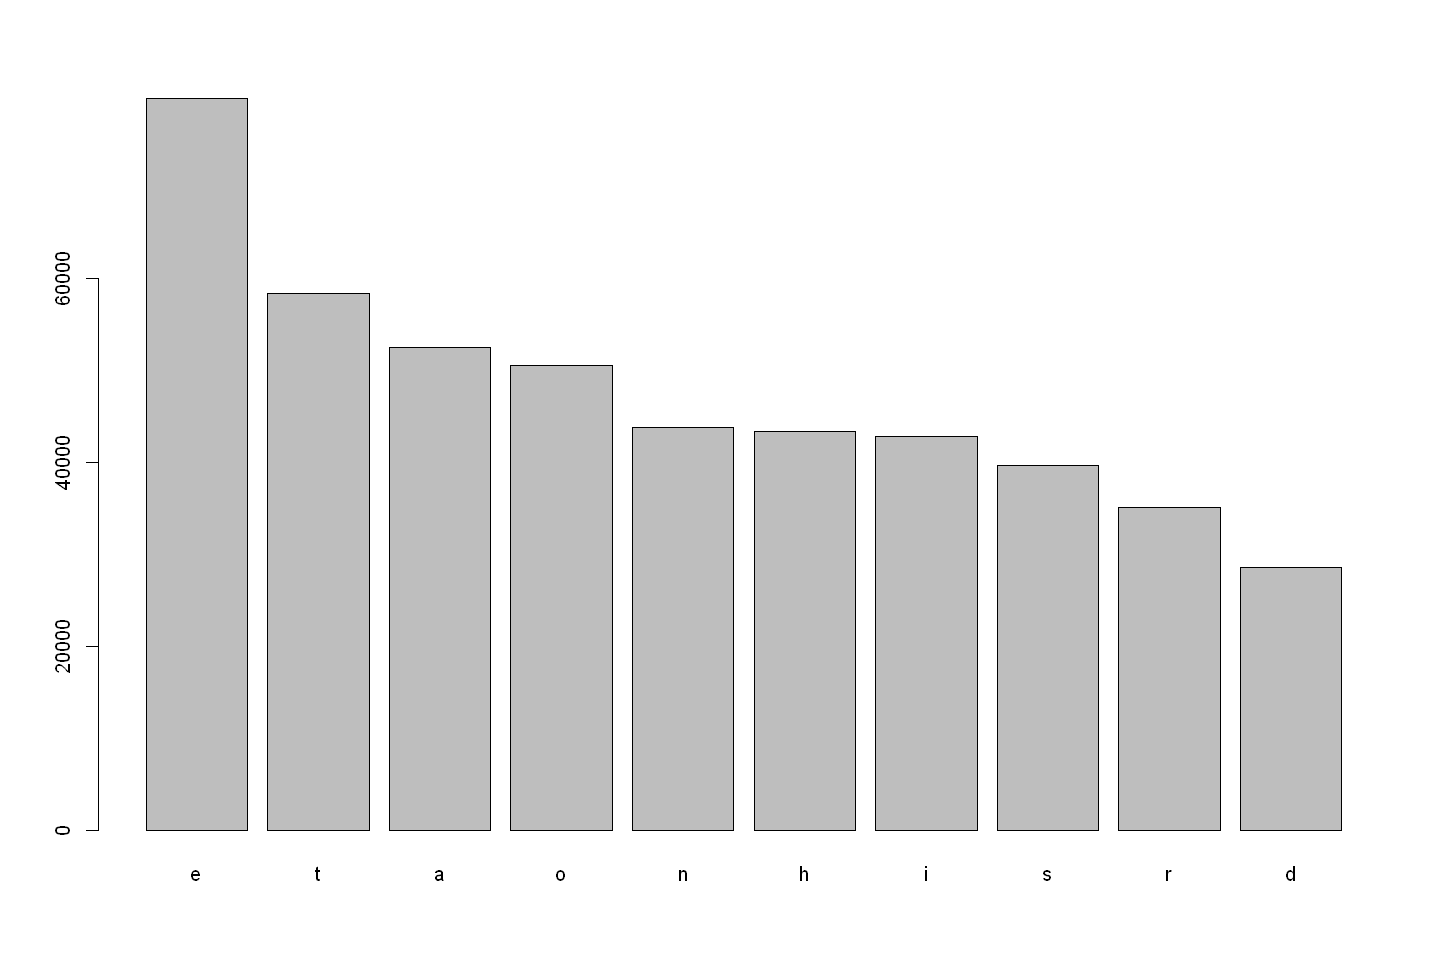

png 
  2

png 
  2

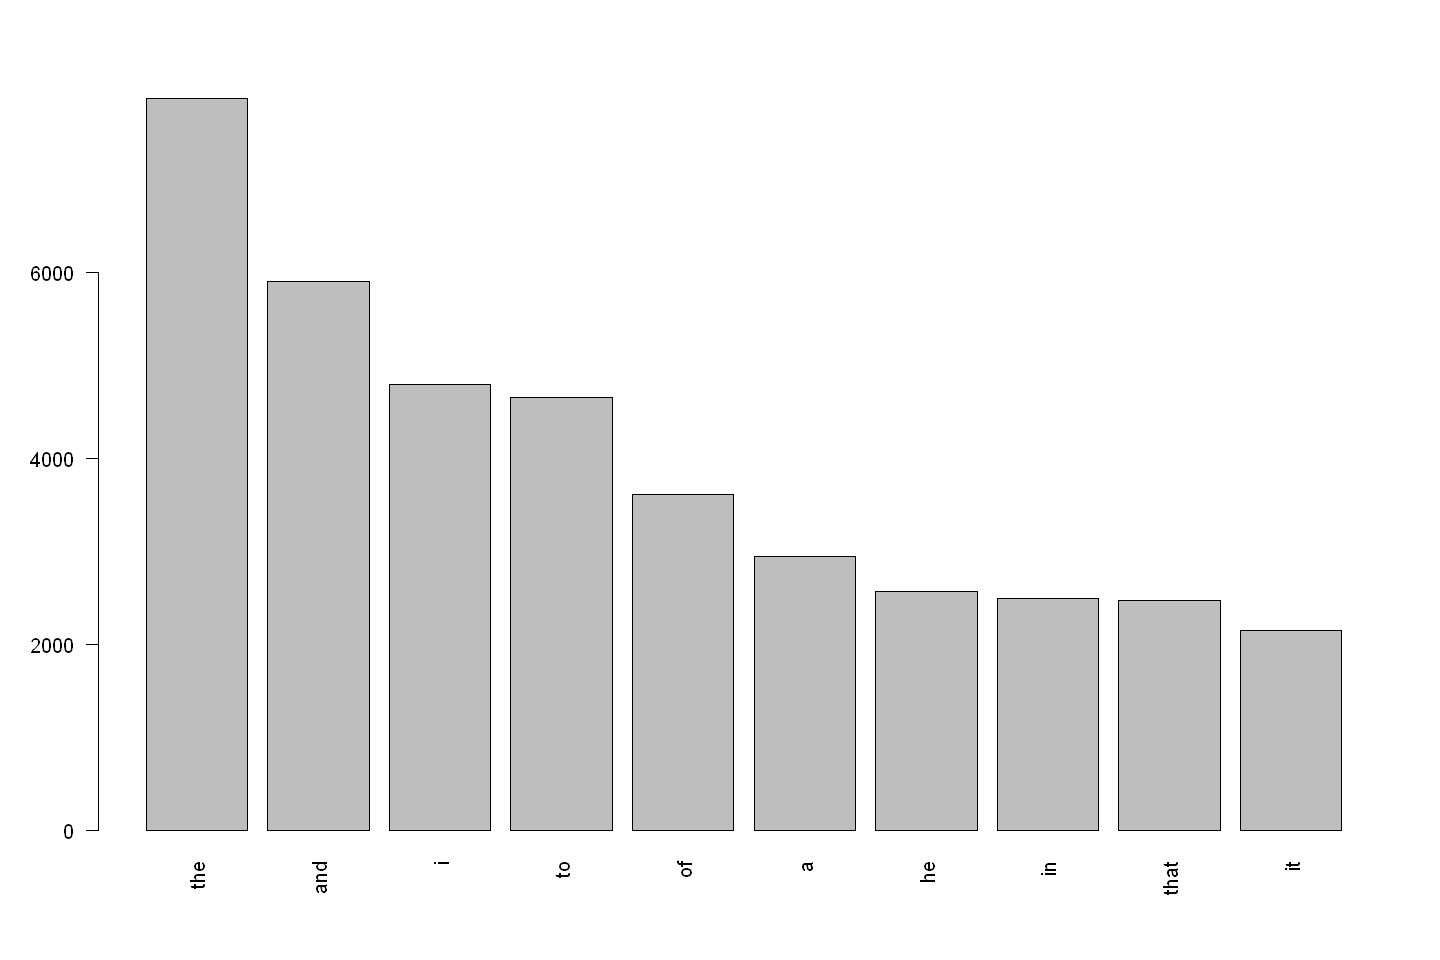

In [13]:
library(repr)
options(repr.plot.width=12, repr.plot.height=8)
barplot(s_letras$Freq[1:10], names = s_letras$letras[1:10])
barplot(s_palabras$Freq[1:10], names = s_palabras$word[1:10], las=2)

# https://stackoverflow.com/a/8147482/3113008
setEPS()
postscript(file="letras.eps", width=12, height=8)
barplot(s_letras$Freq[1:10], names = s_letras$letras[1:10], cex.axis=1.5, cex.names=1.5)
dev.off()

setEPS()
postscript(file="palabras.eps", width=12, height=8)
barplot(s_palabras$Freq[1:10], names = s_palabras$word[1:10], las=2, cex.axis=1.5, cex.names=1.5)
dev.off()

De esto podríamos decir que la letra *e* es la más usada en este libro y que el artículo *the* también lo es, pero esto no agrega mucho al entendimiento de la estructura del libro en sí. Existe un término denominado *palabras vacías* (o *stop words* en ingl+es) que se refiere a palabras que en un idioma carecen de significado fuera de contexto (más información [aquí](https://googleseo.marketing/seo-que-son-stop-words-palabras-vacias/)). En español se incluyen todos las preposiciones, artículos y adverbios. Una lista más detallada se halla en [esta página](https://googleseo.marketing/lista-de-stop-words-o-palabras-vacias-en-espanol/). Al eliminar estas palabras, se obtendría una lista de palabras más significativas.

Primero se carga la librería [`stopwords`](https://www.rdocumentation.org/packages/stopwords/versions/2.0) (también existe la opción de `tidytext` pero la librería de `stopwords` posee más opciones para filtrar palabras) y se guardan las palabras vacías del inglés.

In [14]:
# https://stackoverflow.com/a/43969398/3113008 
# head(s_palabras %>% anti_join(stop_words), 20)

In [15]:
if (!require('stopwords')) install.packages('stopwords'); library('stopwords')

Loading required package: stopwords



In [16]:
sw = stopwords::stopwords("en", source = "stopwords-iso")
head(sw)

[1] "'ll"   "'tis"  "'twas" "'ve"   "10"    "39"

Ahora se eliminan de la lista de letras.

,word,Freq
,<fct>,<int>
8567,time,390
8998,van,322
5591,night,310
4063,helsing,300
5049,lucy,221
2209,day,220
3908,hand,210
5302,mina,203
2601,door,200


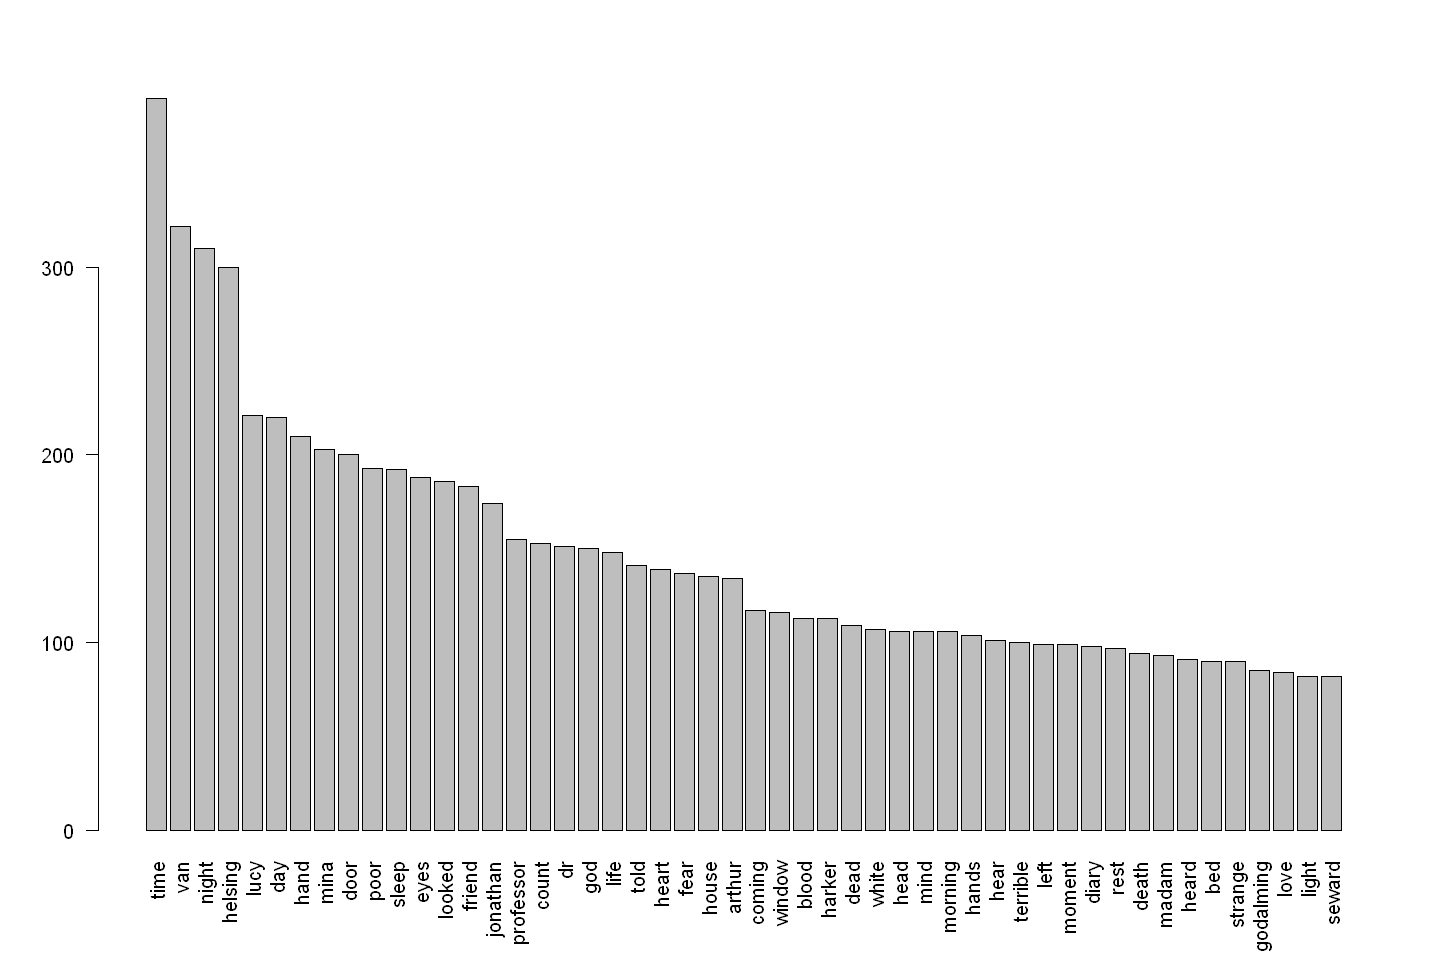

In [17]:
sw_palabras = s_palabras[!(s_palabras$word %in% sw), ]
head(sw_palabras, 20)
options(repr.plot.width=12, repr.plot.height=8)
barplot(sw_palabras$Freq[1:50], names = sw_palabras$word[1:50],las=2)

Finalmente se puede generar una nube de palabras con estos resultados y la librería `wordcloud`.

In [18]:
if (!require('wordcloud')) install.packages('wordcloud'); library('wordcloud')

Loading required package: wordcloud

Loading required package: RColorBrewer



png 
  2

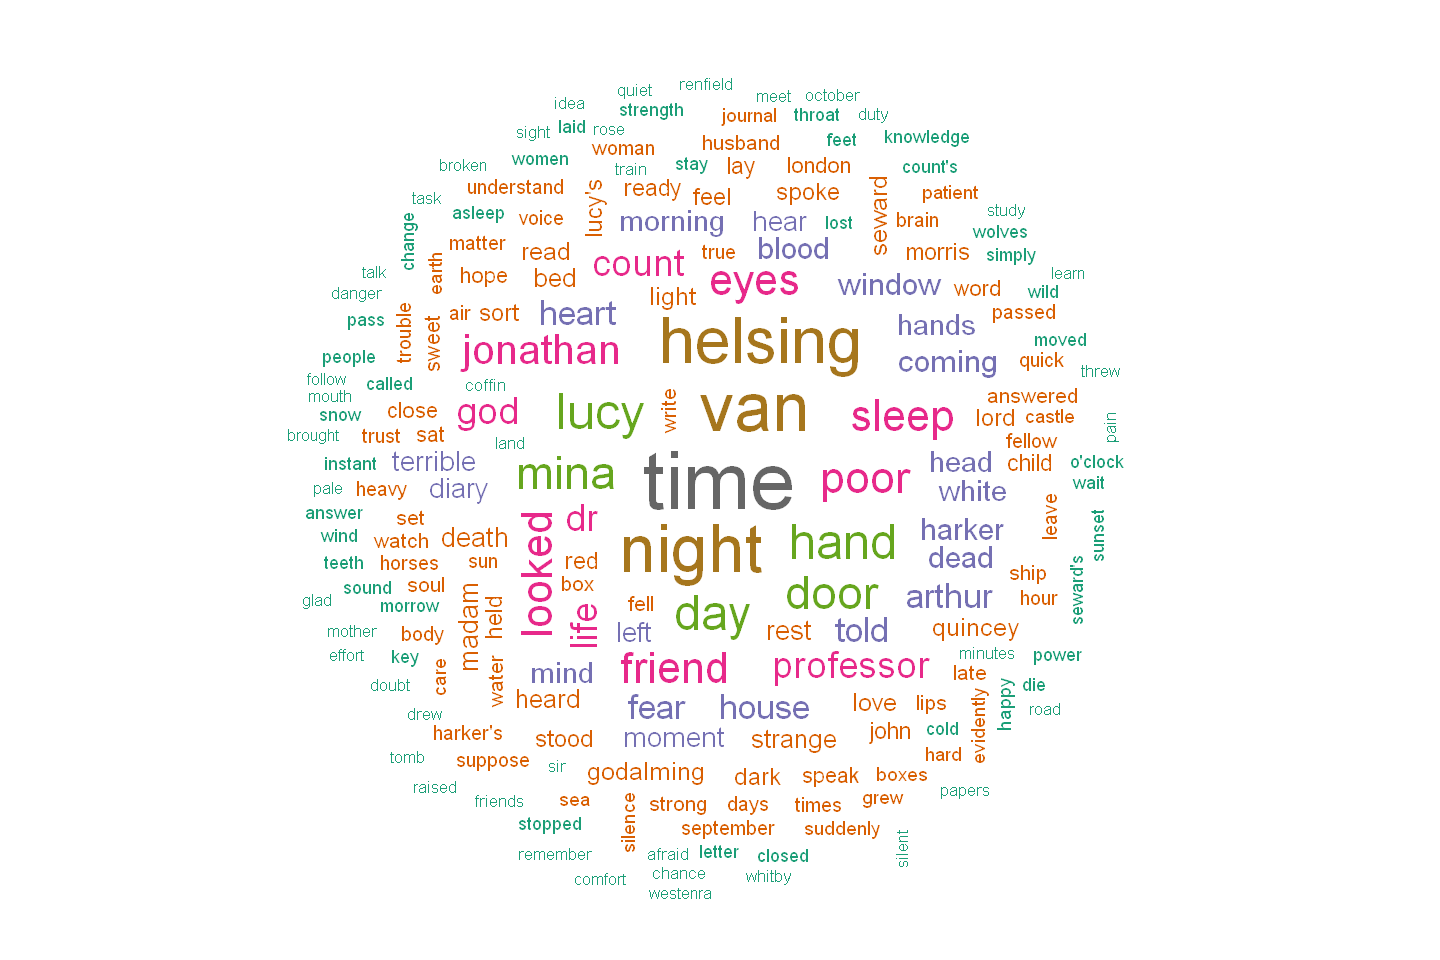

In [19]:
wordcloud(words = sw_palabras$word, freq = sw_palabras$Freq, min.freq = 1, max.words=200, random.order=FALSE, colors=brewer.pal(8, "Dark2"))
# wordcloud(words = s_letras$letras, freq = s_letras$Freq, min.freq = 1, max.words=200, random.order=FALSE, colors=brewer.pal(8, "Dark2"))

setEPS()
postscript(file="wc_palabras.eps")
wordcloud(words = sw_palabras$word, freq = sw_palabras$Freq, min.freq = 1, max.words=200, random.order=FALSE, colors=brewer.pal(8, "Dark2"))
dev.off()

Se puede hacer una animación de nube de palabras que muestren la frecuencia acumulada de estas palabras para entender mejor cómo evoluciona la historia. Para no hacerlo línea por línea, se pueden hacer en acumulados de líneas.

In [20]:
lineas = nrow(libro2)
saltos = floor(lineas / 100)

digitos = floor(log(nrow(libro2)))

j = 1
for (i in seq(saltos, lineas, saltos)){
    set.seed(33)
    p = libro2[1:i,] %>% unnest_tokens(word, text, "words")
    t_p = table(p)
    df_p = as.data.frame(t_p)
    df_p$gutenberg_id <- NULL
    s_p = df_p[order(-df_p$Freq), ]
    sw_p = s_p[!(s_p$word %in% sw), ]
    
    n = sprintf("imgs/wc_%d.png", digitos)
    png(sprintf("imgs/wc_%03d.png", j), width = 480, height = 960)
    par(mar = c(5.1, 8, 4.1, 2.1)) # https://bookdown.org/ndphillips/YaRrr/plot-margins.html
    
    # https://stackoverflow.com/a/21912337/3113008
    barplot(rev(sw_p$Freq[1:50]), names = rev(sw_p$word[1:50]), main=sprintf("%d%%",j), horiz=TRUE, las=1)
    #layout(matrix(c(1, 2), nrow=2), heights=c(1, 4))
    #par(mar=rep(0, 4))
    #plot.new()
    #text(x=0.5, y=0.5, paste(j, "%", collapse=""))
    #wordcloud(words = sw_p$word, freq = sw_p$Freq, min.freq = 1, max.words=200, random.order=FALSE, colors=brewer.pal(8, "Dark2"))
    dev.off()
    j = j + 1
}

In [21]:
# https://www.r-bloggers.com/working-with-windows-cmd-system-commands-in-r/
# https://imagemagick.org/discourse-server/viewtopic.php?t=24912

shell("magick -delay 50 imgs/*.png animation.gif")

Ahora se procederá a encontrar los bigramas de la obra. Esto se utiliza para ver la cantidad de veces que una palabra sigue de otra.

In [22]:
# https://www.tidytextmining.com/ngrams.html
# https://juanitorduz.github.io/text-mining-networks-and-visualization-plebiscito-tweets/
bigramas <- libro %>%
  unnest_tokens(bigram, text, token = "ngrams", n = 2)
bigramas

gutenberg_id,bigram
<int>,<chr>
345,dracula dracula
345,dracula _by_
345,_by_ bram
345,bram stoker
345,stoker illustration
345,illustration colophon
345,colophon new
345,new york
345,york grosset


Pero nuevamente hay que eliminar las palabras vacías, lo que se logra con:

In [23]:
library(tidyr)
separados <- bigramas %>%
  separate(bigram, c("word1", "word2"), sep = " ")

filtrados <- separados %>%
  filter(!word1 %in% stop_words$word) %>%
  filter(!word2 %in% stop_words$word)

# new bigram counts:
c_bigramas <- filtrados %>% 
  count(word1, word2, sort = TRUE)

c_bigramas


Attaching package: 'tidyr'


The following object is masked from 'package:igraph':

    crossing




word1,word2,n
<chr>,<chr>,<int>
van,helsing,301
madam,mina,84
dr,van,66
lord,godalming,65
dr,seward,60
friend,john,58
seward's,diary,49
harker's,journal,40
poor,dear,36


IGRAPH b3cd582 DN-- 30 23 -- 
+ attr: name (v/c), n (e/n)
+ edges from b3cd582 (vertex names):
 [1] van     ->helsing    madam   ->mina       dr      ->van       
 [4] lord    ->godalming  dr      ->seward     friend  ->john      
 [7] seward's->diary      harker's->journal    poor    ->dear      
[10] dr      ->seward's   _dr     ->seward's   dear    ->madam     
[13] miss    ->lucy       quincey ->morris     poor    ->lucy      
[16] van     ->helsing's  _czarina->catherine_ jonathan->harker's  
[19] poor    ->fellow     _mina   ->harker's   count   ->dracula   
[22] dear    ->lucy       lucy    ->westenra  

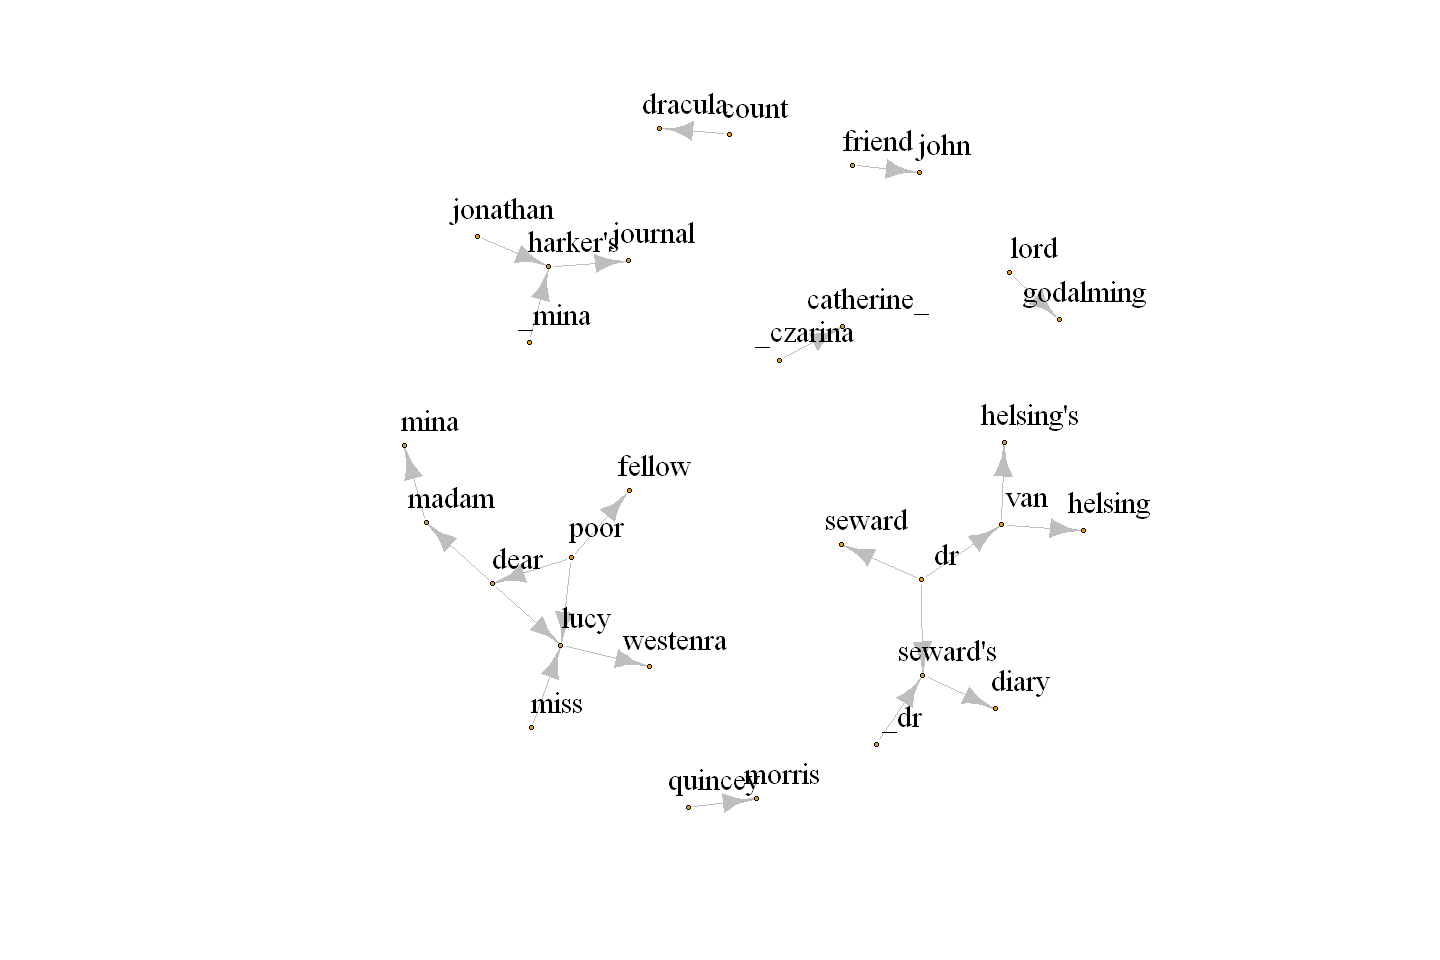

In [26]:
g_bigramas <- c_bigramas %>%
  filter(n > 10) %>%
  graph_from_data_frame()

g_bigramas

set.seed(33)
plot(
  g_bigramas, 
  vertex.size = 1.5,
  vertex.label.color = 'black', 
  vertex.label.cex = 1.5, 
  vertex.label.dist = 1.5,
  edge.color = 'gray', 
)

png 
  2

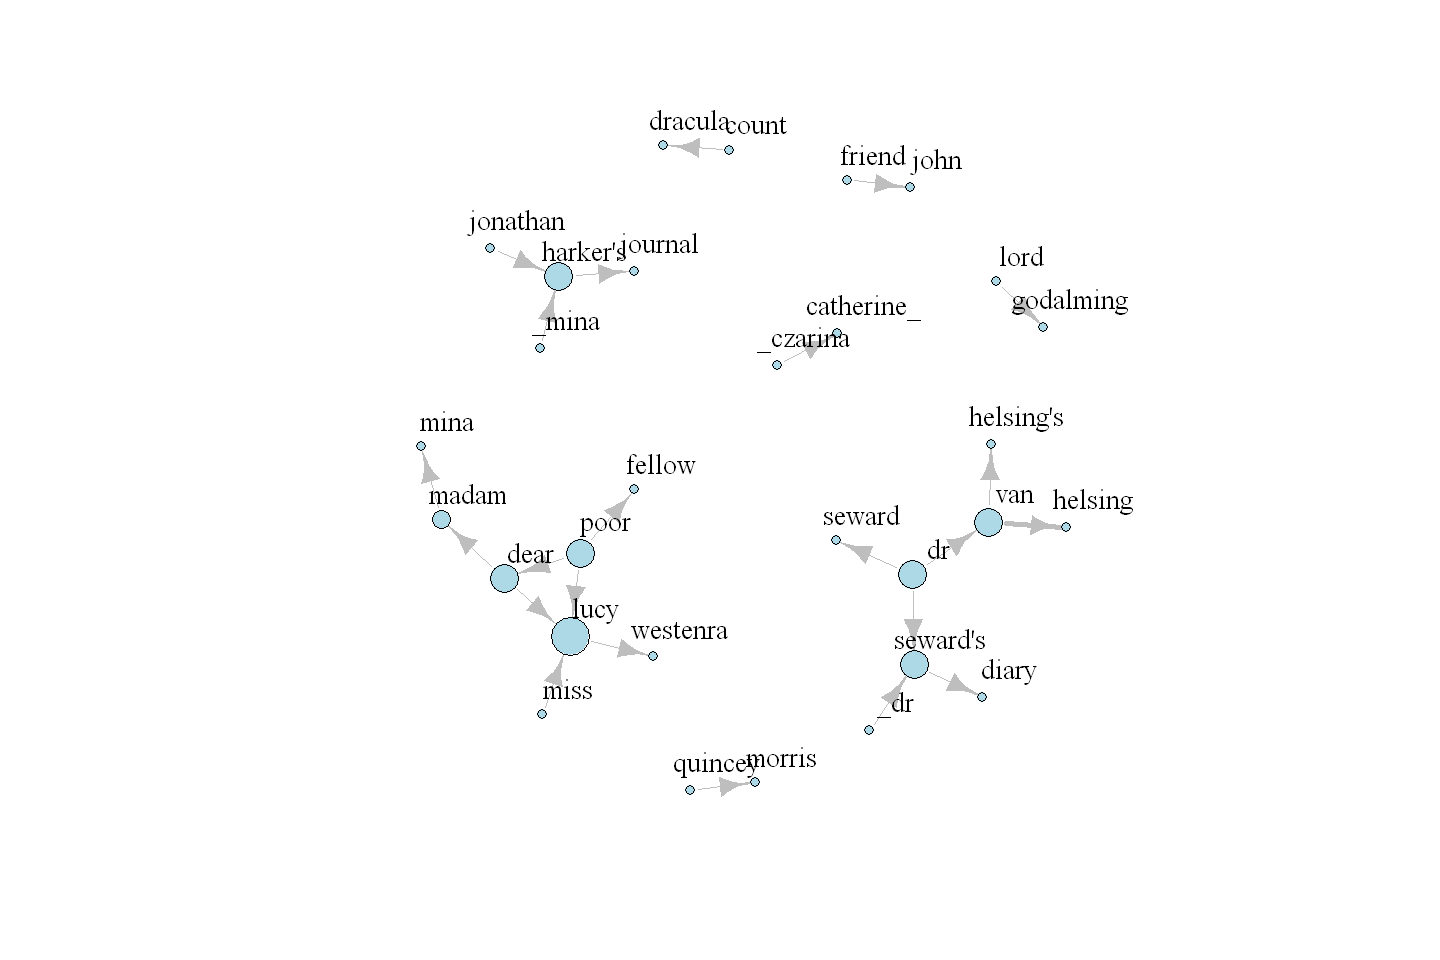

In [38]:
# Store the degree.
V(g_bigramas)$degree <- strength(graph = g_bigramas)

# Compute the weight shares.
E(g_bigramas)$width <- E(g_bigramas)$n/max(E(g_bigramas)$n)

set.seed(33)
plot(
  g_bigramas, 
  vertex.color = 'lightblue',
  # Scale node size by degree.
  vertex.size = 3*V(g_bigramas)$degree,
  vertex.label.color = 'black', 
  vertex.label.cex = 1.4, 
  vertex.label.dist = 1.6,
  edge.color = 'gray', 
  # Set edge width proportional to the weight relative value.
  edge.width = 4*E(g_bigramas)$width
)

pdf("bigramas.pdf")
set.seed(33)
plot(
  g_bigramas, 
  vertex.color = 'lightblue',
  # Scale node size by degree.
  vertex.size = 3*V(g_bigramas)$degree,
  vertex.label.color = 'black', 
  vertex.label.cex = 1, 
  vertex.label.dist = 1.6,
  edge.color = 'gray', 
  # Set edge width proportional to the weight relative value.
  edge.width = 4*E(g_bigramas)$width
)
dev.off()

In [23]:
sw_pares = pares[!(pares$bigram %in% sw), ]

Warning message:
"Unknown or uninitialised column: `word`."


ERROR: Error: Must subset rows with a valid subscript vector.
[34mi[39m Logical subscripts must match the size of the indexed input.
[31mx[39m Input has size 162576 but subscript `!(pares$word %in% sw)` has size 0.
